<a href="https://colab.research.google.com/github/saifullahAnsari0001/Wind-Power-Prediction/blob/main/Wind_power_prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary Library**

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import math
import plotly.express as px
import matplotlib.dates as mdates
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# **Wind Turbine Dataset**

In [3]:
df = pd.read_csv('T1.csv')

In [4]:
df.head()

Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286

In [5]:
df.shape

(50530, 5)

In [6]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format = 'mixed')

#### **Extrating Month and Hour for Data Visualisation purpose**

In [7]:
df.set_index('Date/Time' , inplace= True)

In [8]:
df.rename(columns={'LV ActivePower (kW)': 'Active_Power(kW)',
                   'Wind Speed (m/s)' : 'Wind_Speed(m/s)',
                   'Theoretical_Power_Curve (KWh)': 'Theoretical_Power(KWh)',
                   'Wind Direction (°)': 'Wind_Direction(°)'}, inplace = True)

In [9]:
df.head()

Active_Power(kW)  Wind_Speed(m/s)  \
Date/Time                                                
2018-01-01 00:00:00        380.047791         5.311336   
2018-01-01 00:10:00        453.769196         5.672167   
2018-01-01 00:20:00        306.376587         5.216037   
2018-01-01 00:30:00        419.645905         5.659674   
2018-01-01 00:40:00        380.650696         5.577941   

                     Theoretical_Power(KWh)  Wind_Direction(°)  
Date/Time                                                       
2018-01-01 00:00:00              416.328908         259.994904  
2018-01-01 00:10:00              519.917511         268.641113  
2018-01-01 00:20:00              390.900016         272.564789  
2018-01-01 00:30:00              516.127569         271.258087  
2018-01-01 00:40:00              491.702972         265.674286

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50530 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Active_Power(kW)        50530 non-null  float64
 1   Wind_Speed(m/s)         50530 non-null  float64
 2   Theoretical_Power(KWh)  50530 non-null  float64
 3   Wind_Direction(°)       50530 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB




* ### **From above info we have seen that there is no missing data**
* ### **is there any missing timestamp ?**



In [11]:
df = df.asfreq(freq = '10T')

In [12]:
df.head()

Active_Power(kW)  Wind_Speed(m/s)  \
Date/Time                                                
2018-01-01 00:00:00        380.047791         5.311336   
2018-01-01 00:10:00        453.769196         5.672167   
2018-01-01 00:20:00        306.376587         5.216037   
2018-01-01 00:30:00        419.645905         5.659674   
2018-01-01 00:40:00        380.650696         5.577941   

                     Theoretical_Power(KWh)  Wind_Direction(°)  
Date/Time                                                       
2018-01-01 00:00:00              416.328908         259.994904  
2018-01-01 00:10:00              519.917511         268.641113  
2018-01-01 00:20:00              390.900016         272.564789  
2018-01-01 00:30:00              516.127569         271.258087  
2018-01-01 00:40:00              491.702972         265.674286

In [13]:
df.shape

(52560, 4)

In [14]:
df.isnull().sum()

Active_Power(kW)          2030
Wind_Speed(m/s)           2030
Theoretical_Power(KWh)    2030
Wind_Direction(°)         2030
dtype: int64

#### **There is 2030 missing timestamp**

In [15]:
df[df.isna().any(axis=1)]

Active_Power(kW)  Wind_Speed(m/s)  \
Date/Time                                                
2018-01-10 00:00:00               NaN              NaN   
2018-01-10 00:10:00               NaN              NaN   
2018-01-10 00:20:00               NaN              NaN   
2018-01-10 00:30:00               NaN              NaN   
2018-01-10 00:40:00               NaN              NaN   
...                               ...              ...   
2018-12-17 10:10:00               NaN              NaN   
2018-12-17 10:20:00               NaN              NaN   
2018-12-17 10:30:00               NaN              NaN   
2018-12-17 10:40:00               NaN              NaN   
2018-12-17 10:50:00               NaN              NaN   

                     Theoretical_Power(KWh)  Wind_Direction(°)  
Date/Time                                                       
2018-01-10 00:00:00                     NaN                NaN  
2018-01-10 00:10:00                     NaN                NaN  
2018-01-10 00:20:00                     NaN                NaN  
2018-01-10 00:30:00                     NaN                NaN  
2018-01-10 00:40:00                     NaN                NaN  
...                                     ...                ...  
2018-12-17 10:10:00                     NaN                NaN  
2018-12-17 10:20:00                     NaN                NaN  
2018-12-17 10:30:00                     NaN                NaN  
2018-12-17 10:40:00                     NaN                NaN  
2018-12-17 10:50:00                     NaN                NaN  

[2030 rows x 4 columns]

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
    z=df.isnull().astype(int),
    x=df.columns,
    y=df.index,
    colorscale='viridis'))

fig.update_layout(
    title="Null Timestamps Heatmap",
    xaxis_title="Features",
    yaxis_title="Timestamps")

fig.show()

## **Data visualization and cleaning are essential steps in the analysis process. We'll use visualizations to gain insights and clean the data to ensure its accuracy and reliability.**

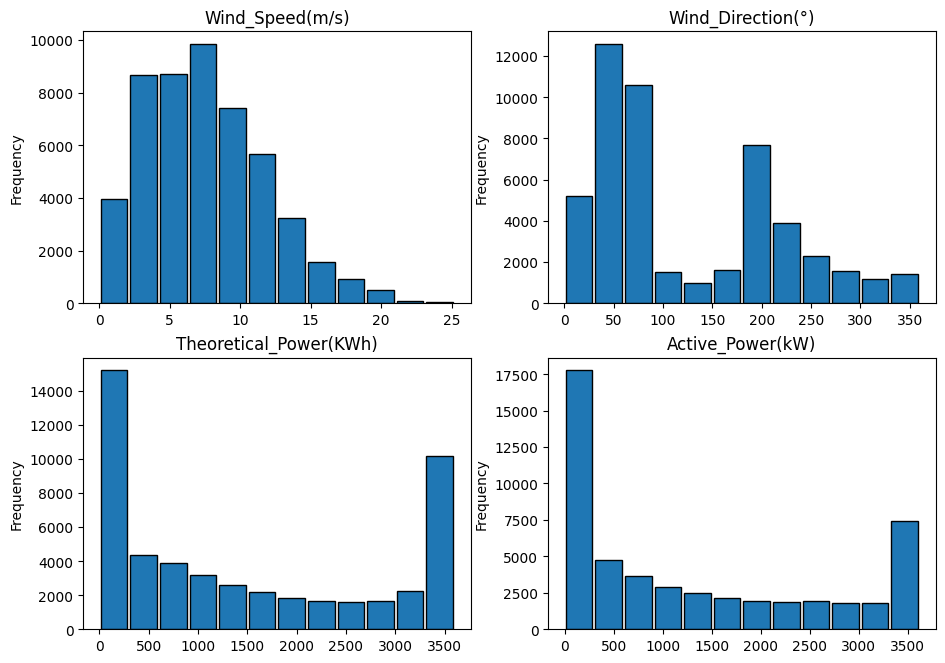

In [17]:
columns1 = ['Wind_Speed(m/s)', 'Wind_Direction(°)','Theoretical_Power(KWh)', 'Active_Power(kW)']
i=1
plt.figure(figsize=(11,12))
for column in columns1:
    plt.subplot(3,2,i)
    df[column].plot.hist(bins=12, rwidth = 0.9, edgecolor = 'black')
    plt.title(column)
    i += 1

### **checking monthly average power production**

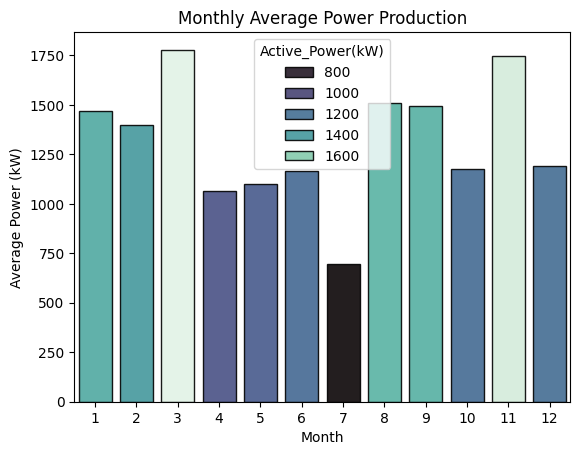

In [18]:
monthly_average = df.groupby(df.index.month)['Active_Power(kW)'].mean().reset_index()

sns.barplot(x='Date/Time', y='Active_Power(kW)', data=monthly_average, palette='mako', hue='Active_Power(kW)', alpha=0.9, edgecolor='black')
plt.title('Monthly Average Power Production')
plt.xlabel('Month')
plt.ylabel('Average Power (kW)')
plt.show()

### **checking correlations between columns**

Text(0.5, 1.0, 'correlation_factor')

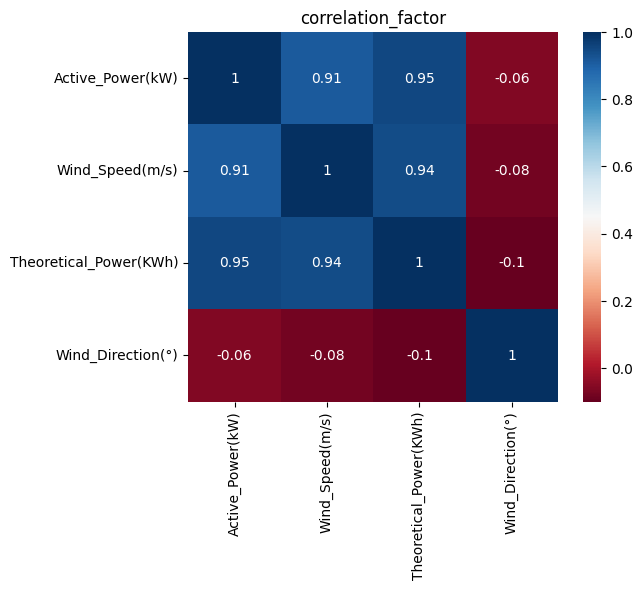

In [19]:
plot=sns.heatmap(df.corr().round(2), cmap = 'RdBu' ,annot=True, square = True)
plot.set_title('correlation_factor')

<Figure size 500x400 with 0 Axes>

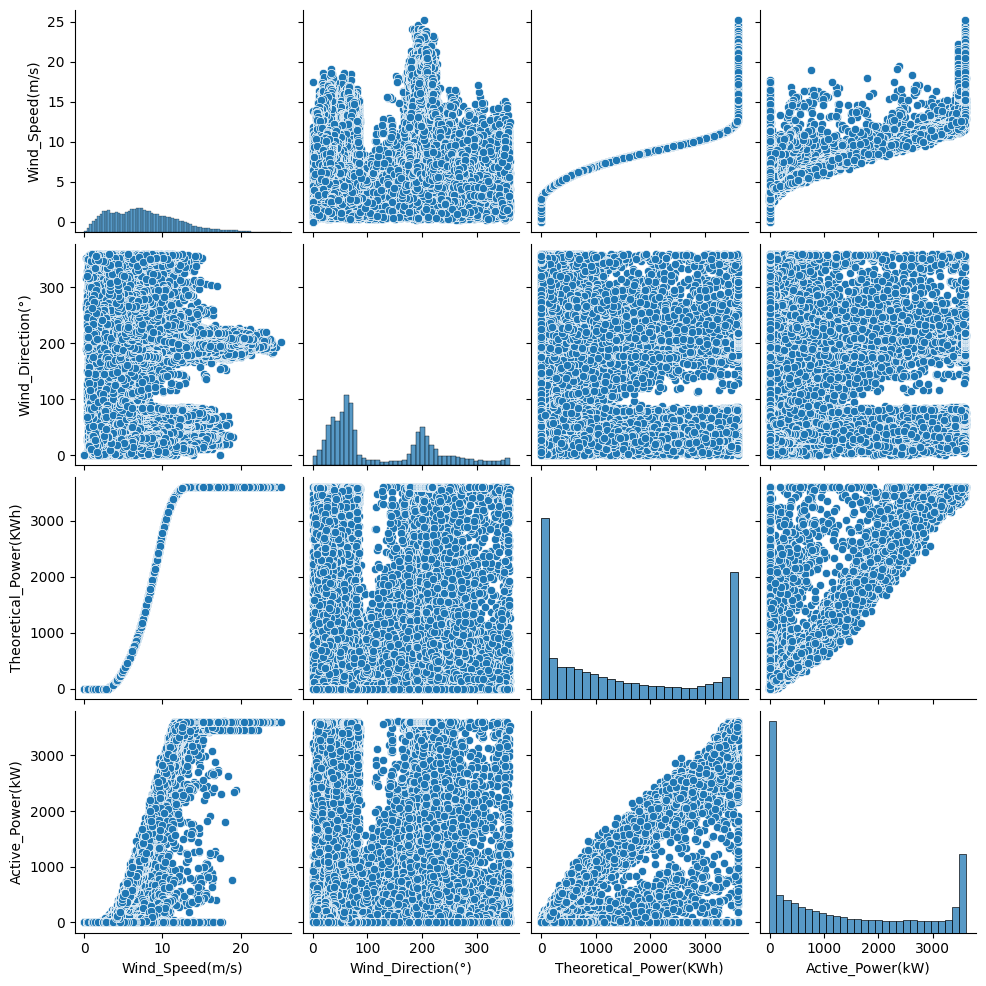

In [20]:
plt.figure(figsize=(5,4))
sns.pairplot(df[columns1])
plt.show()

### **Average power production level at different wind speed**

<ipython-input-21-7672101e349b>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-21-7672101e349b>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




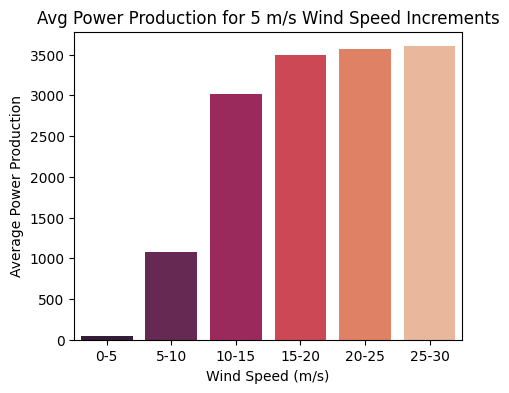

In [21]:
bins = np.arange(0, df['Wind_Speed(m/s)'].max() + 6, 5)

avg_power_per_bin = df.groupby(pd.cut(df['Wind_Speed(m/s)'], bins=bins, right=False))['Active_Power(kW)'].mean()
bin_labels = [f'{int(b.left)}-{int(b.right)}' for b in avg_power_per_bin.index]

plt.figure(figsize=(5, 4))
sns.barplot(x=bin_labels, y=avg_power_per_bin.values, color='green', palette='rocket')
plt.title('Avg Power Production for 5 m/s Wind Speed Increments')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Average Power Production')
plt.show()

### **Power production for different wind directions and wind speed**
**creating a polar diagram with wind speed, wind direction and power production**

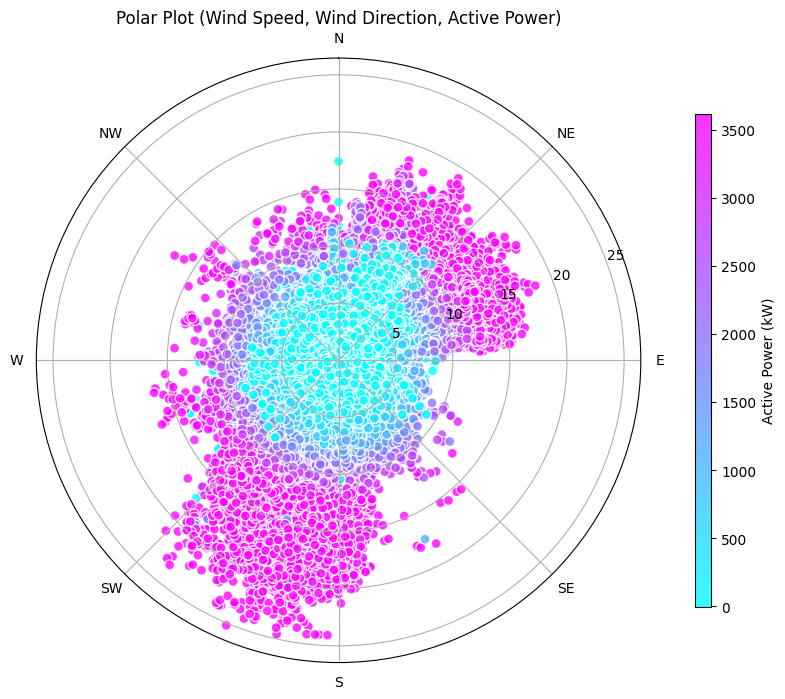

In [22]:
wind_direction = df['Wind_Direction(°)']
wind_speed = df['Wind_Speed(m/s)']
active_power = df['Active_Power(kW)']

theta = np.radians(wind_direction)

plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

c = ax.scatter(theta, wind_speed, c=active_power, s=50, cmap='cool', alpha=0.8, edgecolor='white')

directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
ax.set_xticks(np.linspace(0, 2*np.pi, len(directions), endpoint=False))
ax.set_xticklabels(directions)

cbar = plt.colorbar(c, pad=0.07, aspect=30, shrink=0.8)
cbar.set_label('Active Power (kW)')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ax.set_rlabel_position(70)

plt.title('Polar Plot (Wind Speed, Wind Direction, Active Power)')

plt.show()

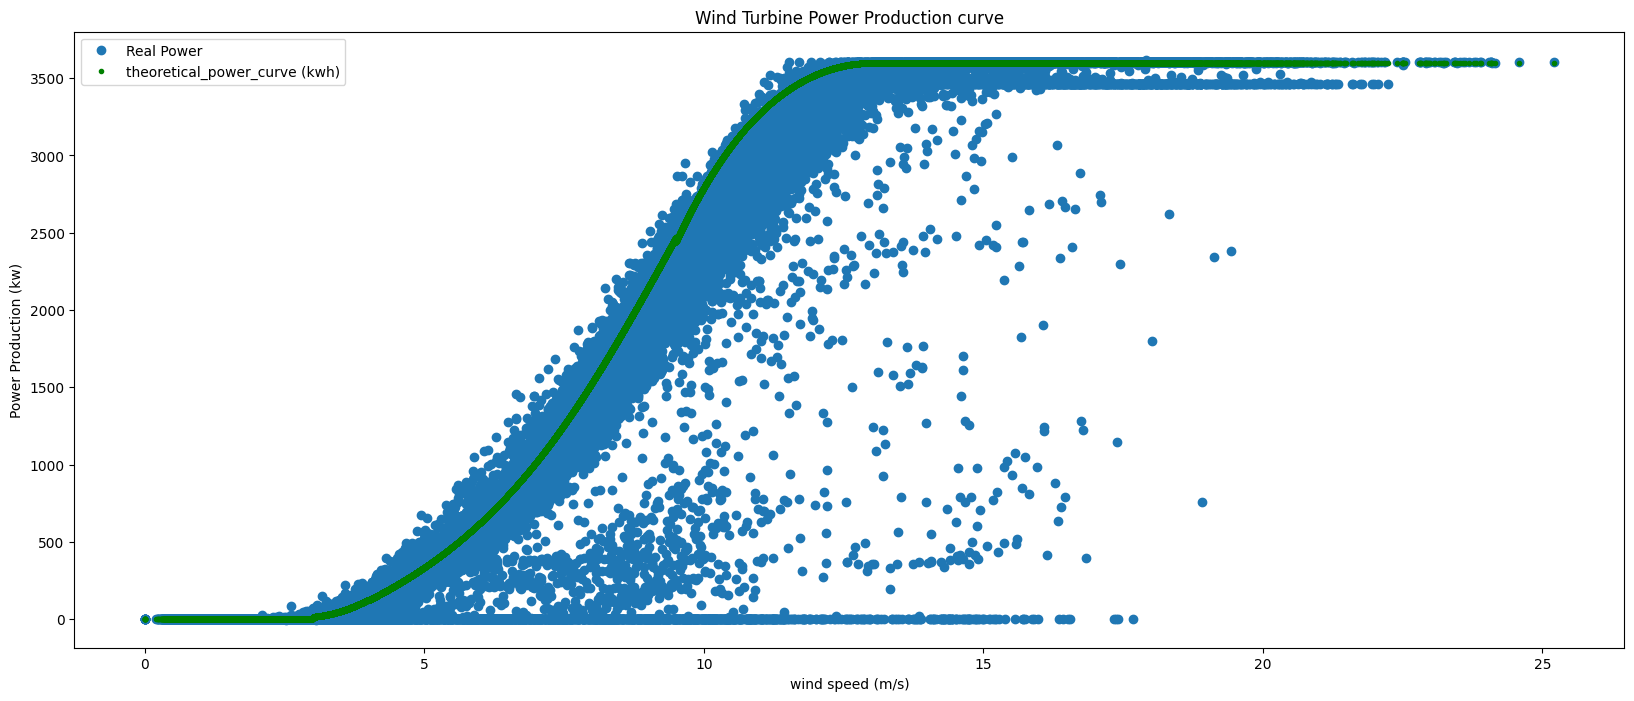

In [23]:
plt.figure(figsize=(20,8))
plt.plot(df['Wind_Speed(m/s)'], df['Active_Power(kW)'], 'o', label='Real Power')
plt.plot(df['Wind_Speed(m/s)'], df['Theoretical_Power(KWh)'], '.', color='green', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)')
plt.ylabel('Power Production (kw)')
plt.title('Wind Turbine Power Production curve')
plt.legend()
plt.show()

In [24]:
# df['Difference'] = np.abs(df['Active_Power(kW)'] - df['Theoretical_Power(KWh)'])
# tolerance = 2000

# filtered_indices = df['Difference'] < tolerance
# # filtered_wind_speed = df.loc[filtered_indices, 'Wind_Speed(m/s)']
# # filtered_real_power = df.loc[filtered_indices, 'Active_Power(kW)']
# filtered_df = df.loc[filtered_indices, columns1]

# plt.figure(figsize=(20, 8))
# plt.plot(filtered_df['Wind_Speed(m/s)'], filtered_df['Active_Power(kW)'], 'o', label="Updated Real Power")
# plt.plot(df['Wind_Speed(m/s)'], df['Theoretical_Power(KWh)'], '.', color='green', label="Theoretical Power Curve")
# plt.xlabel("Wind Speed (m/s)")
# plt.ylabel("Power Produced (kW)")
# plt.title("Wind Turbine Power Production (Updated)")
# plt.legend()
# plt.show()

In [25]:
df.head()

Active_Power(kW)  Wind_Speed(m/s)  \
Date/Time                                                
2018-01-01 00:00:00        380.047791         5.311336   
2018-01-01 00:10:00        453.769196         5.672167   
2018-01-01 00:20:00        306.376587         5.216037   
2018-01-01 00:30:00        419.645905         5.659674   
2018-01-01 00:40:00        380.650696         5.577941   

                     Theoretical_Power(KWh)  Wind_Direction(°)  
Date/Time                                                       
2018-01-01 00:00:00              416.328908         259.994904  
2018-01-01 00:10:00              519.917511         268.641113  
2018-01-01 00:20:00              390.900016         272.564789  
2018-01-01 00:30:00              516.127569         271.258087  
2018-01-01 00:40:00              491.702972         265.674286

In [26]:
df.describe()

Active_Power(kW)  Wind_Speed(m/s)  Theoretical_Power(KWh)  \
count      50530.000000     50530.000000            50530.000000   
mean        1307.684332         7.557952             1492.175463   
std         1312.459242         4.227166             1368.018238   
min           -2.471405         0.000000                0.000000   
25%           50.677890         4.201395              161.328167   
50%          825.838074         7.104594             1063.776283   
75%         2482.507568        10.300020             2964.972462   
max         3618.732910        25.206011             3600.000000   

       Wind_Direction(°)  
count       50530.000000  
mean          123.687559  
std            93.443736  
min             0.000000  
25%            49.315437  
50%            73.712978  
75%           201.696720  
max           359.997589

#### **From the graph above, we noticed that, based on the expected power curve, the turbines should start producing power when the wind speed goes above 3 meters per second. But sometimes, we see zero power even when the wind speed is higher than 3 m/s.**

In [27]:
zero_power = df.loc[(df['Active_Power(kW)'] == 0) &
                     (df['Theoretical_Power(KWh)'] == 0),
                     ['Wind_Speed(m/s)', 'Active_Power(kW)', 'Theoretical_Power(KWh)']]

zero_power.round(3).max()

Wind_Speed(m/s)           3.0
Active_Power(kW)          0.0
Theoretical_Power(KWh)    0.0
dtype: float64

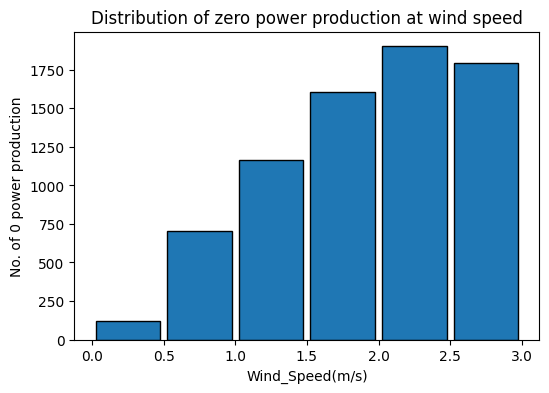

In [28]:
speed = [0,0.5,1,1.5,2,2.5,3]
plt.figure(figsize =(6,4))
plt.hist(zero_power['Wind_Speed(m/s)'], bins=speed, rwidth=0.9, alpha = 1, edgecolor='black')
plt.title('Distribution of zero power production at wind speed')
plt.xlabel('Wind_Speed(m/s)')
plt.ylabel('No. of 0 power production')
plt.show()

#### **We can see from above, that the limit for the theoretical power curve is 3 m/s wind speed. If the wind speed is below 3 m/s model doesn't expect any power production**

##### Observations for the wind speed > 3m/s and power production = 0, While theoretically there should be power production

In [29]:
zero_Active_Power_subset = df.loc[(df['Active_Power(kW)'] == 0) &
                                  (df['Theoretical_Power(KWh)'] != 0) &
                                  (df['Wind_Speed(m/s)'] > 3),
                                  ['Wind_Speed(m/s)', 'Active_Power(kW)', 'Theoretical_Power(KWh)']]

zero_Active_Power_subset.sort_values(by='Wind_Speed(m/s)').round(3).sample(5)

Wind_Speed(m/s)  Active_Power(kW)  Theoretical_Power(KWh)
Date/Time                                                                     
2018-01-24 11:00:00           10.270               0.0                2948.850
2018-07-20 07:50:00            3.457               0.0                  47.354
2018-12-27 02:00:00            4.581               0.0                 239.436
2018-08-01 16:20:00            4.469               0.0                 215.523
2018-10-23 19:10:00            3.647               0.0                  70.211

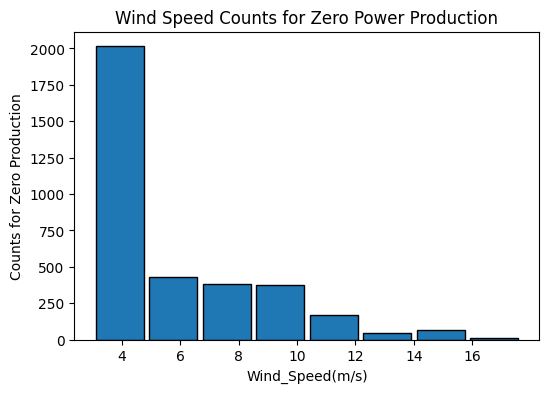

In [30]:
zero_Active_Power_subset['Wind_Speed(m/s)'].plot.hist(figsize = (6,4),  rwidth=0.9, bins=8, edgecolor = 'black')
plt.xlabel('Wind_Speed(m/s)')
plt.ylabel('Counts for Zero Production')
plt.title('Wind Speed Counts for Zero Power Production')
plt.xticks(ticks=np.arange(4,18,2));

#### **Out of the total instances, 3,497 observations stand out where, based on theoretical expectations, wind turbines are anticipated to generate power. But in reality, these instances show that no power is being generated.**

#### **Considering these 3,497 instances where zero power production contradicts theoretical expectations, we might treat them as outliers and choose to replace their values with NaN rather than excluding them from the dataset entirely. Following this, we'll fill these NaN values with appropriate data to ensure the dataset remains comprehensive and usable for analysis.**

In [31]:
df.loc[zero_Active_Power_subset.index, 'Active_Power(kW)'] = np.nan

In [32]:
df.isnull().sum()

Active_Power(kW)          5527
Wind_Speed(m/s)           2030
Theoretical_Power(KWh)    2030
Wind_Direction(°)         2030
dtype: int64

In [33]:
df.describe()

Active_Power(kW)  Wind_Speed(m/s)  Theoretical_Power(KWh)  \
count      47033.000000     50530.000000            50530.000000   
mean        1404.913344         7.557952             1492.175463   
std         1309.208087         4.227166             1368.018238   
min           -2.471405         0.000000                0.000000   
25%          166.337494         4.201395              161.328167   
50%          987.410278         7.104594             1063.776283   
75%         2611.777100        10.300020             2964.972462   
max         3618.732910        25.206011             3600.000000   

       Wind_Direction(°)  
count       50530.000000  
mean          123.687559  
std            93.443736  
min             0.000000  
25%            49.315437  
50%            73.712978  
75%           201.696720  
max           359.997589

#### **From the chart description highlights the presence of negative power generation instances, which are physically implausible. Recognizing these as outliers, I've decided to replace them with NaN values in the dataset. Subsequently, I'll fill these NaN values to uphold data integrity and enhance reliability.**

In [34]:
neg_power = df[df['Active_Power(kW)'] < 0]
neg_power[['Active_Power(kW)','Theoretical_Power(KWh)']].head()

Active_Power(kW)  Theoretical_Power(KWh)
Date/Time                                                    
2018-01-05 05:20:00         -0.515600                0.000000
2018-01-07 11:30:00         -0.095733                0.000000
2018-01-15 16:20:00         -0.269599                0.000000
2018-01-22 02:10:00         -0.099067               17.686014
2018-01-31 17:20:00         -0.488667                0.000000

In [35]:
df.loc[neg_power.index, 'Active_Power(kW)'] = np.nan

In [36]:
df.describe()

Active_Power(kW)  Wind_Speed(m/s)  Theoretical_Power(KWh)  \
count      46976.000000     50530.000000            50530.000000   
mean        1406.618440         7.557952             1492.175463   
std         1309.086172         4.227166             1368.018238   
min            0.000000         0.000000                0.000000   
25%          168.456177         4.201395              161.328167   
50%          991.071045         7.104594             1063.776283   
75%         2613.350708        10.300020             2964.972462   
max         3618.732910        25.206011             3600.000000   

       Wind_Direction(°)  
count       50530.000000  
mean          123.687559  
std            93.443736  
min             0.000000  
25%            49.315437  
50%            73.712978  
75%           201.696720  
max           359.997589

In [37]:
df.isnull().sum()

Active_Power(kW)          5584
Wind_Speed(m/s)           2030
Theoretical_Power(KWh)    2030
Wind_Direction(°)         2030
dtype: int64

### **We're making a boxplot to look at the data and see if there are any unusual points that might be considered outliers.**

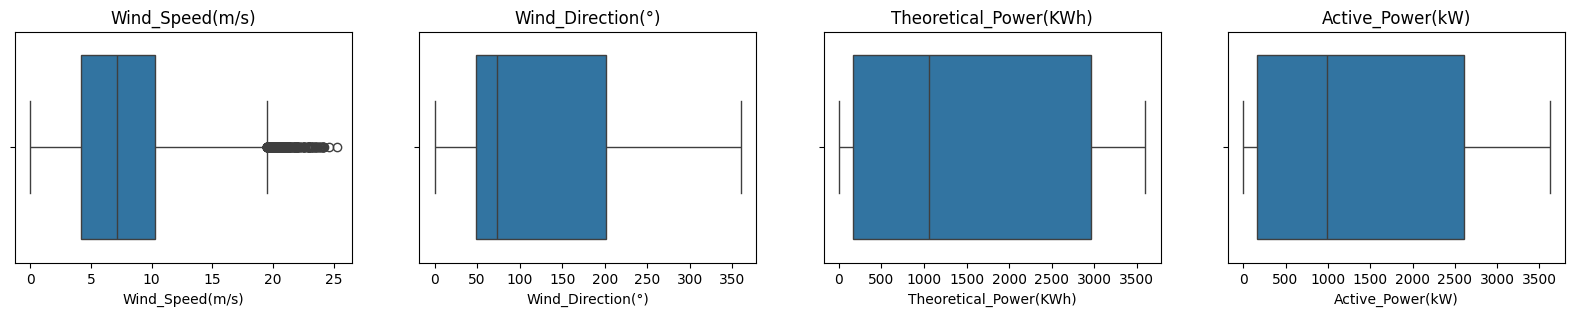

In [38]:
columns2 = ['Wind_Speed(m/s)', 'Wind_Direction(°)','Theoretical_Power(KWh)', 'Active_Power(kW)']
i=1
plt.figure(figsize=(20,3))
for column in columns2:
    plt.subplot(1,4,i)
    sns.boxplot(data=df[column], orient = 'h')
    plt.title(column)
    i += 1

#### **Upon examining the boxplot, it's apparent that there are outliers in the wind power data. However, since wind speeds up to 25m/s can still generate power, we are not treating these instances as outliers. Additionally, I'll increase the size of the boxplot for better visibility**

In [39]:
# plt.figure(figsize=(20, 3))
# for i, column in enumerate(columns2, 1):
#     plt.subplot(1, 4, i)
#     sns.boxplot(data=df_cleaned[column], orient='h', whis=2.4)
#     plt.title(column)
# plt.show()

# thresholds = {
#     'Wind_Speed(m/s)': {'lower': 3, 'upper': 18}
# }

# # Function to remove outliers based on custom thresholds for a specific column
# def remove_outliers_custom(df, column, lower_bound, upper_bound):
#     df2 = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df2

# # Apply custom threshold only to 'Wind_Speed(m/s)' column
# df_cleaned = remove_outliers_custom(df, 'Wind_Speed(m/s)', thresholds['Wind_Speed(m/s)']['lower'], thresholds['Wind_Speed(m/s)']['upper'])

# # Visualize cleaned data
# plt.figure(figsize=(20, 3))
# for i, column in enumerate(columns2, 1):
#     plt.subplot(1, 4, i)
#     sns.boxplot(data=df_cleaned[column], orient='h')
#     plt.title(column)
# plt.show()

## **We're addressing the issue of missing timestamps and null values in the dataset by employing the K-Nearest Neighbors (KNN) imputer. This method leverages the similarity of nearby data points to accurately fill in the gaps, ensuring that both timestamps and values are complete and ready for subsequent analysis.**

In [40]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)

In [41]:
df_final = pd.DataFrame(df_imputed, index = df.index , columns=df.columns)

In [42]:
df_final['Month'] = df.index.month
df_final['Day'] = df.index.day
df_final['Hour'] = df.index.hour
df_final['Minute'] = df.index.minute

In [43]:
df_final['Difference'] = np.abs(df_final['Active_Power(kW)'] - df_final['Theoretical_Power(KWh)'])
filtered_df = df_final

In [44]:
df_final.shape, filtered_df.shape

((52560, 9), (52560, 9))

Text(0.5, 1.0, 'correlation_factor')

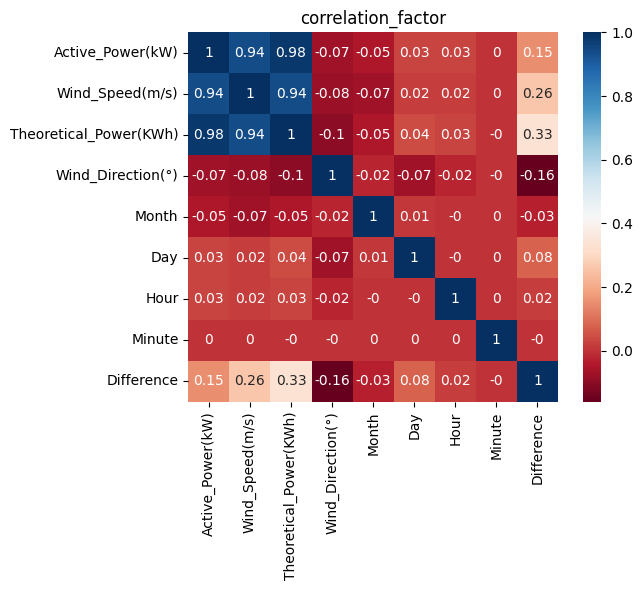

In [45]:
plot=sns.heatmap(filtered_df.corr().round(2), cmap = 'RdBu' ,annot=True, square = True)
plot.set_title('correlation_factor')

In [46]:
filtered_df.head()

Active_Power(kW)  Wind_Speed(m/s)  \
Date/Time                                                
2018-01-01 00:00:00        380.047791         5.311336   
2018-01-01 00:10:00        453.769196         5.672167   
2018-01-01 00:20:00        306.376587         5.216037   
2018-01-01 00:30:00        419.645905         5.659674   
2018-01-01 00:40:00        380.650696         5.577941   

                     Theoretical_Power(KWh)  Wind_Direction(°)  Month  Day  \
Date/Time                                                                    
2018-01-01 00:00:00              416.328908         259.994904      1    1   
2018-01-01 00:10:00              519.917511         268.641113      1    1   
2018-01-01 00:20:00              390.900016         272.564789      1    1   
2018-01-01 00:30:00              516.127569         271.258087      1    1   
2018-01-01 00:40:00              491.702972         265.674286      1    1   

                     Hour  Minute  Difference  
Date/Time                                      
2018-01-01 00:00:00     0       0   36.281117  
2018-01-01 00:10:00     0      10   66.148316  
2018-01-01 00:20:00     0      20   84.523429  
2018-01-01 00:30:00     0      30   96.481664  
2018-01-01 00:40:00     0      40  111.052276

In [47]:
filtered_df.isnull().sum()

Active_Power(kW)          0
Wind_Speed(m/s)           0
Theoretical_Power(KWh)    0
Wind_Direction(°)         0
Month                     0
Day                       0
Hour                      0
Minute                    0
Difference                0
dtype: int64

In [48]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Freq: 10T
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Active_Power(kW)        52560 non-null  float64
 1   Wind_Speed(m/s)         52560 non-null  float64
 2   Theoretical_Power(KWh)  52560 non-null  float64
 3   Wind_Direction(°)       52560 non-null  float64
 4   Month                   52560 non-null  int32  
 5   Day                     52560 non-null  int32  
 6   Hour                    52560 non-null  int32  
 7   Minute                  52560 non-null  int32  
 8   Difference              52560 non-null  float64
dtypes: float64(5), int32(4)
memory usage: 5.2 MB


In [49]:
filtered_df.loc[(filtered_df['Active_Power(kW)'] == 0) &
            (filtered_df['Theoretical_Power(KWh)'] != 0) &
            (filtered_df['Wind_Speed(m/s)'] > 3)].head()

Empty DataFrame
Columns: [Active_Power(kW), Wind_Speed(m/s), Theoretical_Power(KWh), Wind_Direction(°), Month, Day, Hour, Minute, Difference]
Index: []

In [50]:
df_final.describe()

Active_Power(kW)  Wind_Speed(m/s)  Theoretical_Power(KWh)  \
count      52560.000000     52560.000000            52560.000000   
mean        1358.039100         7.557952             1492.175463   
std         1276.772452         4.144729             1341.339433   
min            0.000000         0.000000                0.000000   
25%          144.221451         4.322057              185.255152   
50%         1006.830505         7.320685             1167.142897   
75%         2449.894531        10.143522             2878.159588   
max         3618.732910        25.206011             3600.000000   

       Wind_Direction(°)         Month           Day          Hour  \
count       52560.000000  52560.000000  52560.000000  52560.000000   
mean          123.687559      6.526027     15.720548     11.500000   
std            91.621416      3.447884      8.796331      6.922252   
min             0.000000      1.000000      1.000000      0.000000   
25%            50.537824      4.000000      8.000000      5.750000   
50%            76.072613      7.000000     16.000000     11.500000   
75%           200.164181     10.000000     23.000000     17.250000   
max           359.997589     12.000000     31.000000     23.000000   

             Minute    Difference  
count  52560.000000  52560.000000  
mean      25.000000    145.094558  
std       17.078414    260.162017  
min        0.000000      0.000000  
25%       10.000000      8.525900  
50%       25.000000     76.994093  
75%       40.000000    174.899375  
max       50.000000   3581.179300

In [51]:
df1 = df.dropna()

In [52]:
df1.shape

(46976, 4)

# **Implementing ML model**

#### **Splitting the dataset into training and testing sets.**

In [53]:
XML= filtered_df.drop(['Active_Power(kW)'] , axis = 1)
yml= filtered_df['Active_Power(kW)']
XML_train , XML_test , yml_train , yml_test = train_test_split(XML,yml , test_size= 0.20 , random_state=42)

In [54]:
XML_train.shape , XML_test.shape , yml_train.shape , yml_test.shape

((42048, 8), (10512, 8), (42048,), (10512,))

In [55]:
scaler = MinMaxScaler()

XML_train_scaled = scaler.fit_transform(XML_train)
XML_test_scaled = scaler.transform(XML_test)

### **Now, let's implement our model and evaluate its accuracy score**

#### **1. Random Forest Regression**

In [56]:
# Random Forest Regressor with
RF = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=8, min_samples_split=2, min_samples_leaf=1)
RF.fit(XML_train_scaled, yml_train)

# Predictions
RF_train_pred = RF.predict(XML_train_scaled)
RF_test_pred = RF.predict(XML_test_scaled)

# Metrics for training set
RF_train_MAE = mean_absolute_error(yml_train, RF_train_pred)
RF_train_RMSE = np.sqrt(mean_squared_error(yml_train, RF_train_pred))
RF_train_R2 = r2_score(yml_train, RF_train_pred)

# Metrics for test set
RF_test_MAE = mean_absolute_error(yml_test, RF_test_pred)
RF_test_RMSE = np.sqrt(mean_squared_error(yml_test, RF_test_pred))
RF_test_R2 = r2_score(yml_test, RF_test_pred)

#### **2. XG Boost Regressor**

In [57]:
# XGBoost Regressor
XGB = XGBRegressor(n_estimators=100, booster='gbtree', max_depth=5, reg_alpha=0.01, reg_lambda=0.01)
XGB.fit(XML_train_scaled, yml_train)

# Predictions
XGB_train_pred = XGB.predict(XML_train_scaled)
XGB_test_pred = XGB.predict(XML_test_scaled)

# Metrics for training set
XGB_train_MAE = mean_absolute_error(yml_train, XGB_train_pred)
XGB_train_RMSE = np.sqrt(mean_squared_error(yml_train, XGB_train_pred))
XGB_train_R2 = r2_score(yml_train, XGB_train_pred)

# Metrics for test set
XGB_test_MAE = mean_absolute_error(yml_test, XGB_test_pred)
XGB_test_RMSE = np.sqrt(mean_squared_error(yml_test, XGB_test_pred))
XGB_test_R2 = r2_score(yml_test, XGB_test_pred)

#### **3. Support Vector Regressor**

In [58]:
# Support Vector Regression (SVR)
SVR_model = SVR(kernel='rbf', C=10)
SVR_model.fit(XML_train_scaled, yml_train)

# Predictions using the SVR model
SVR_train_pred = SVR_model.predict(XML_train_scaled)
SVR_test_pred = SVR_model.predict(XML_test_scaled)

# Metrics for training set
SVR_train_MAE = mean_absolute_error(yml_train, SVR_train_pred)
SVR_train_RMSE = np.sqrt(mean_squared_error(yml_train, SVR_train_pred))
SVR_train_R2 = r2_score(yml_train, SVR_train_pred)

# Metrics for test set
SVR_test_MAE = mean_absolute_error(yml_test, SVR_test_pred)
SVR_test_RMSE = np.sqrt(mean_squared_error(yml_test, SVR_test_pred))
SVR_test_R2 = r2_score(yml_test, SVR_test_pred)

In [59]:
# Compile results into a DataFrame
results = {
    'Model': ['RandomForestRegressor', 'RandomForestRegressor', 'XGBRegressor', 'XGBRegressor', 'SVR', 'SVR'],
    'Data Set': ['Train', 'Test', 'Train', 'Test', 'Train', 'Test'],
    'MAE': [RF_train_MAE, RF_test_MAE, XGB_train_MAE, XGB_test_MAE, SVR_train_MAE, SVR_test_MAE],
    'RMSE': [RF_train_RMSE, RF_test_RMSE, XGB_train_RMSE, XGB_test_RMSE, SVR_train_RMSE, SVR_test_RMSE],
    'R2': [RF_train_R2, RF_test_R2, XGB_train_R2, XGB_test_R2, SVR_train_R2, SVR_test_R2]
}

results_df = pd.DataFrame(results)

In [69]:
results_df.T

0                      1             2  \
Model     RandomForestRegressor  RandomForestRegressor  XGBRegressor   
Data Set                  Train                   Test         Train   
MAE                   68.378137              69.248295     15.994104   
RMSE                 110.717079             112.217068      31.54174   
R2                     0.992462               0.992348      0.999388   

                     3         4          5  
Model     XGBRegressor       SVR        SVR  
Data Set          Test     Train       Test  
MAE          18.740818  44.06491  43.681587  
RMSE         41.409775  84.30114  83.300693  
R2            0.998958   0.99563   0.995784

In [62]:
def Act_vs_Pred(y_test, y_predicted):
    return pd.DataFrame({"actual": y_test, "predicted": y_predicted}, index=y_test.index)

def Act_vs_Pred_Scatter_plot(model_name, data):
    data = data.head(30)
    fig = px.scatter(data, x=data.index, y=['actual', 'predicted'],
                     labels={'value': 'Active Power', 'index': 'Date', 'variable': 'Legend'},
                     title=f'Actual vs Predicted power point - {model_name}',
                     template='plotly_white')
    fig.update_traces(marker=dict(size=10))
    fig.update_layout(title_x=0.5)
    fig.show()

# Assuming y_test, y_pred1, y_pred2, y_pred4 are already defined

# RandomForestRegressor
RF_Act_Pred = Act_vs_Pred(yml_test, RF_test_pred)
print(RF_Act_Pred.tail(5))
Act_vs_Pred_Scatter_plot('RandomForestRegressor', RF_Act_Pred)

# XGBRegressor
XGB_Act_Pred = Act_vs_Pred(yml_test, XGB_test_pred)
print(XGB_Act_Pred.tail(5))
Act_vs_Pred_Scatter_plot('XGBRegressor', XGB_Act_Pred)

# SVR
SVR_Act_Pred = Act_vs_Pred(yml_test, SVR_test_pred)
print(SVR_Act_Pred.tail(5))
Act_vs_Pred_Scatter_plot('SVR', SVR_Act_Pred)

                          actual    predicted
Date/Time                                    
2018-04-05 12:00:00  1406.618440  1371.774509
2018-06-21 04:40:00    38.623126   121.111629
2018-04-22 00:10:00   305.368286   339.522591
2018-11-05 00:40:00     0.000000     5.996844
2018-01-20 14:40:00  3461.865967  3462.880932


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



                          actual    predicted
Date/Time                                    
2018-04-05 12:00:00  1406.618440  1405.111084
2018-06-21 04:40:00    38.623126    52.072052
2018-04-22 00:10:00   305.368286   316.240356
2018-11-05 00:40:00     0.000000    -1.537182
2018-01-20 14:40:00  3461.865967  3460.303955


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



                          actual    predicted
Date/Time                                    
2018-04-05 12:00:00  1406.618440  1400.351189
2018-06-21 04:40:00    38.623126    47.922482
2018-04-22 00:10:00   305.368286   313.049560
2018-11-05 00:40:00     0.000000    66.648310
2018-01-20 14:40:00  3461.865967  3506.245194


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [65]:
def Predicted_Power_Curve(model_name, y_actual, y_predicted):
    theoretical_power = XML_test['Theoretical_Power(KWh)']
    wind_speed_values = XML_test['Wind_Speed(m/s)']

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=wind_speed_values, y=y_actual, mode='markers',
        name='Real Power', marker=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=wind_speed_values, y=y_predicted, mode='markers',
        name='Predicted Power', marker=dict(color='red')
    ))

    fig.add_trace(go.Scatter(
        x=wind_speed_values, y=theoretical_power, mode='markers',
        name='Theoretical Power Curve (kWh)', marker=dict(color='green')
    ))

    fig.update_layout(
        title=f'Actual vs Predicted power curve - {model_name}',
        xaxis_title='Wind Speed (m/s)',
        yaxis_title='Power Production (kW)',
        legend=dict(font=dict(size=15)),
        template='plotly_white',
        width=1000,
        height=600
    )

    fig.show()

# Assuming y_test, y_pred1, y_pred2, y_pred3, y_pred4 are already defined

Predicted_Power_Curve('RandomForestRegressor', yml_test, RF_test_pred)
Predicted_Power_Curve('XGBRegressor', yml_test, XGB_test_pred)
Predicted_Power_Curve('SVR', yml_test, SVR_test_pred)

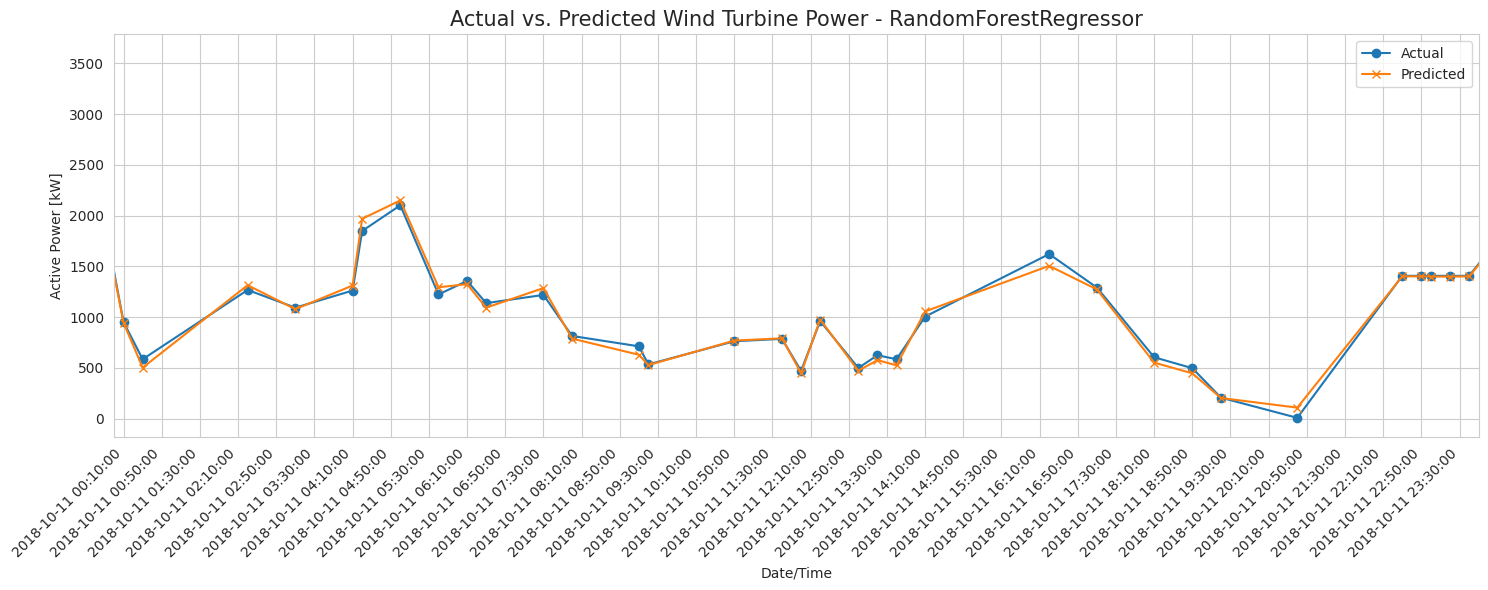

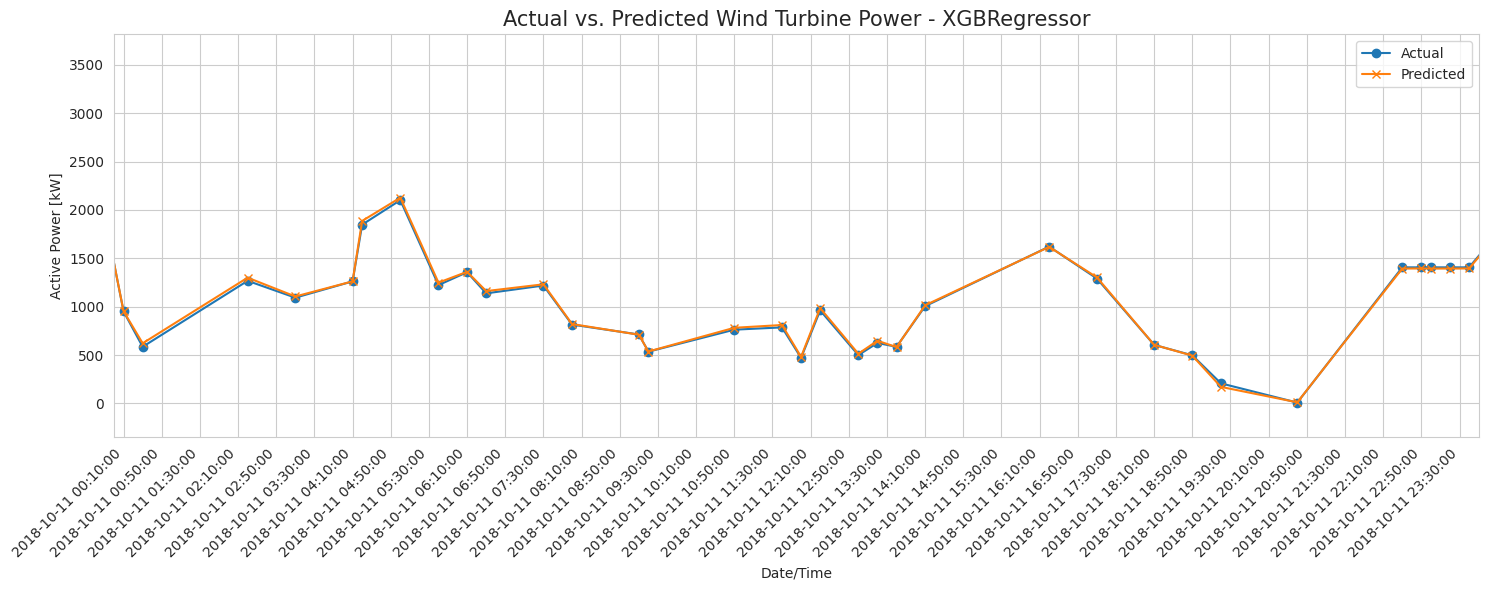

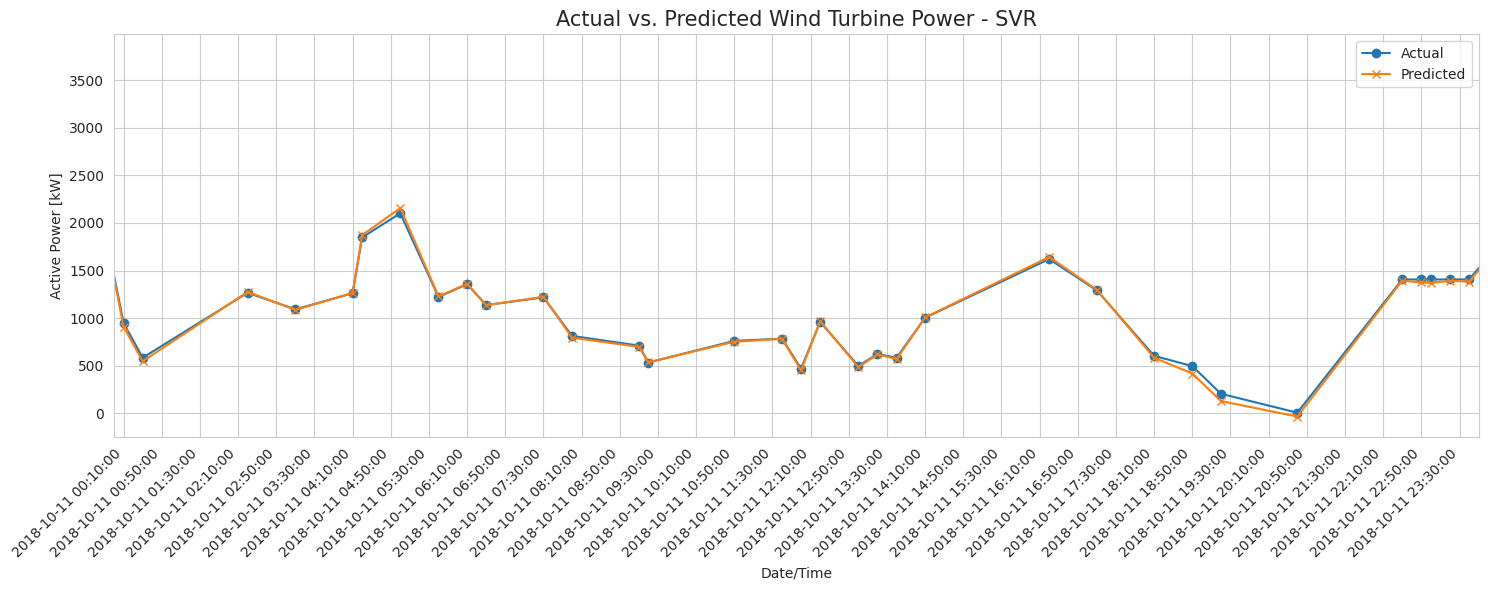

In [66]:
# Time series plot for Actual vs Predicted
def plot_time_series(y_test, y_test_pred, model_name):
    sns.set_style("whitegrid")
    y_prediction = pd.DataFrame(y_test_pred, columns=['active_power'])
    y_prediction.index = y_test.index

    plt.figure(figsize=(15, 6))
    ax = y_test.plot(marker='o')
    y_prediction.plot(ax=ax, marker='x')
    ax.set_xlim(np.datetime64('2018-10-11 00:00:00'), np.datetime64('2018-10-11 23:50:00'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=40))
    plt.gcf().autofmt_xdate()
    plt.title(f'Actual vs. Predicted Wind Turbine Power - {model_name}', size=15)
    plt.ylabel('Active Power [kW]')
    plt.legend(['Actual', 'Predicted'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming y_test, y_pred1, y_pred2, y_pred4 are already defined
plot_time_series(yml_test, RF_test_pred, 'RandomForestRegressor')
plot_time_series(yml_test, XGB_test_pred, 'XGBRegressor')
plot_time_series(yml_test, SVR_test_pred, 'SVR')